In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

# Data reading and exploration

In [2]:
house_df = pd.read_csv("kc_house_data.csv")

In [3]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [7]:
house_df.shape

(21613, 21)

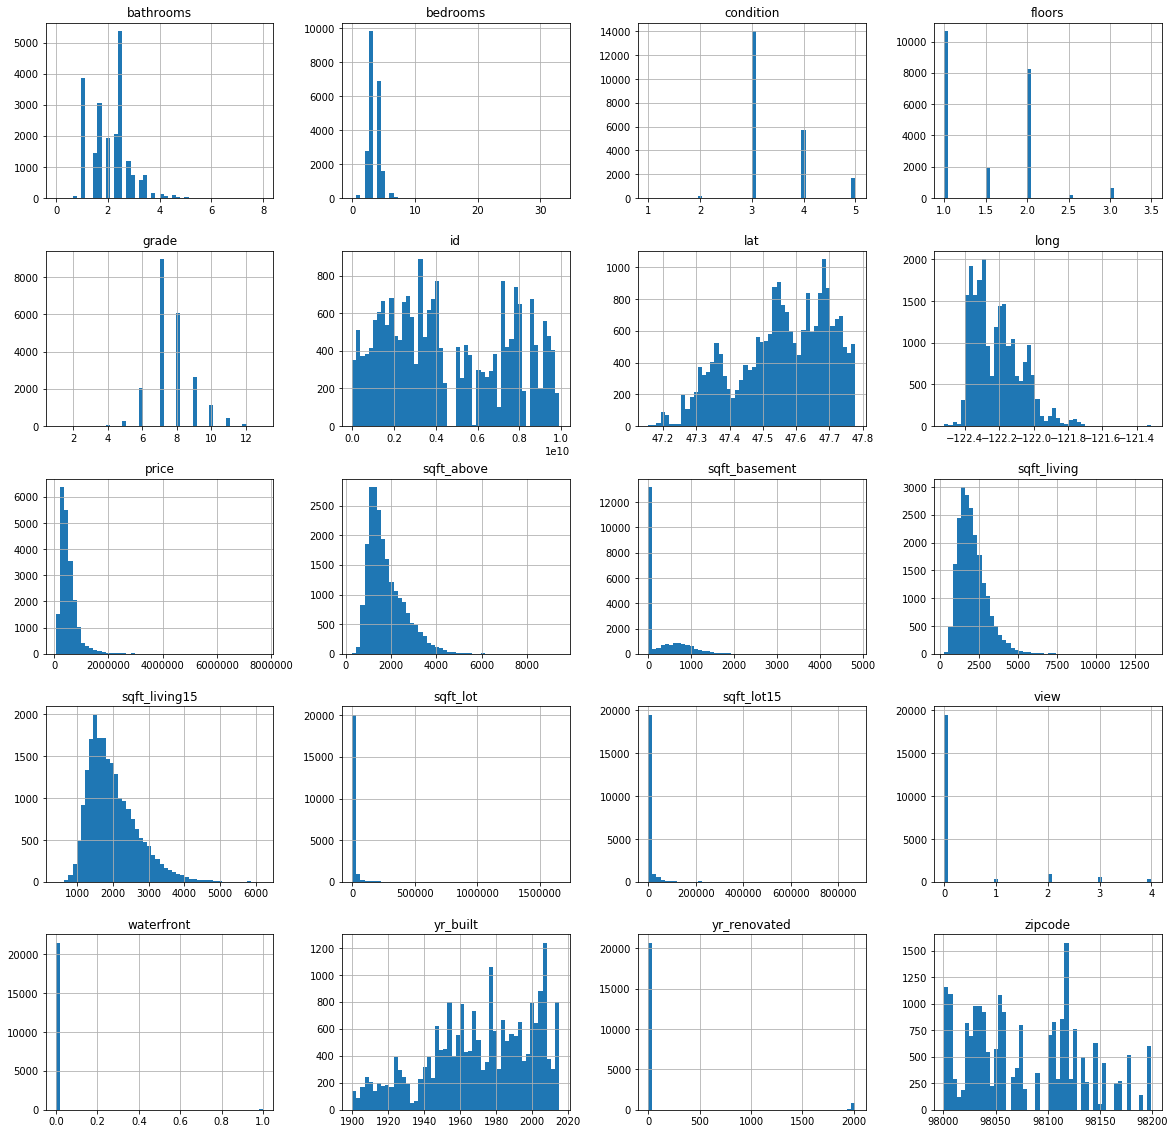

In [8]:
house_df.hist(bins=50, figsize=(20,20))
plt.show()

In [9]:
house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Train-Test Set Split 

In [10]:
train_set, test_set = train_test_split(house_df,test_size=0.2,random_state=42)

In [11]:
len(train_set),len(test_set)

(17290, 4323)

In [12]:
# create a copy of the train_set
house_df_train= train_set.copy() 

# Data Visualization 

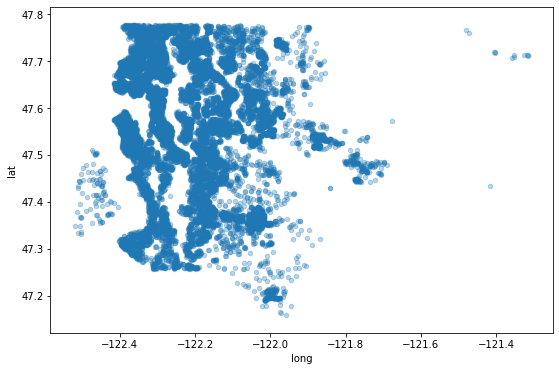

In [13]:
house_df_train.plot(kind='scatter',x='long',y='lat',alpha='0.3',figsize=(9,6))
plt.show()

In [14]:
corr=house_df_train.corr()
corr['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701701
grade            0.665093
sqft_above       0.603255
sqft_living15    0.582667
bathrooms        0.526618
view             0.392108
sqft_basement    0.321387
lat              0.310770
bedrooms         0.308262
floors           0.253425
waterfront       0.252946
yr_renovated     0.127737
sqft_lot         0.091039
sqft_lot15       0.079152
yr_built         0.049100
condition        0.036344
long             0.023486
id              -0.020623
zipcode         -0.053803
Name: price, dtype: float64

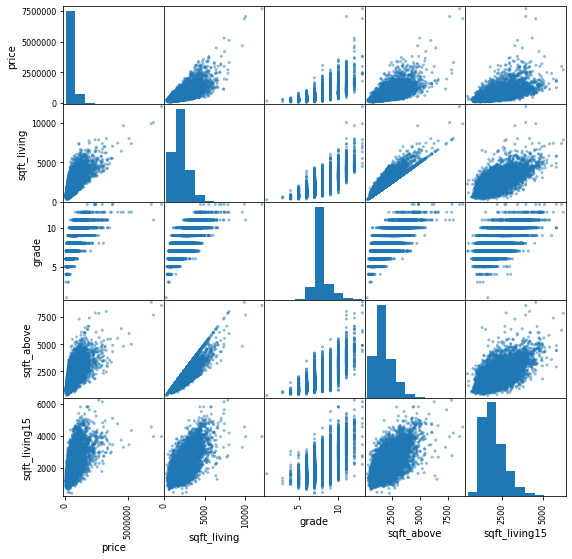

In [15]:
attributes=['price','sqft_living','grade','sqft_above','sqft_living15']
scatter_matrix(house_df_train[attributes],figsize=(9,9))
plt.show()

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

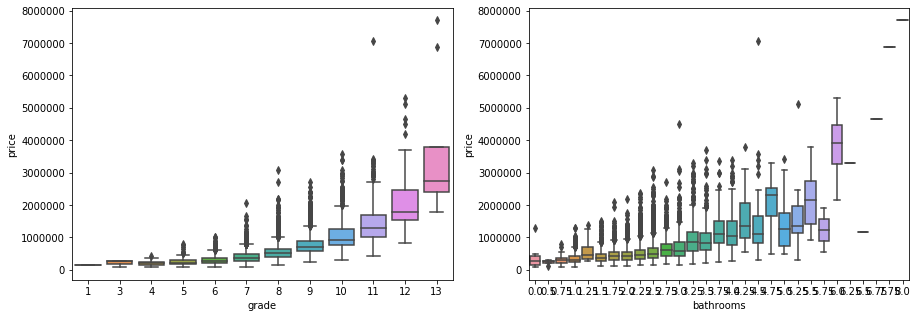

In [16]:
f, axes= plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=house_df_train['grade'],y=house_df_train['price'],ax=axes[0])
sns.boxplot(x=house_df_train['bathrooms'],y=house_df_train['price'],ax=axes[1])

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

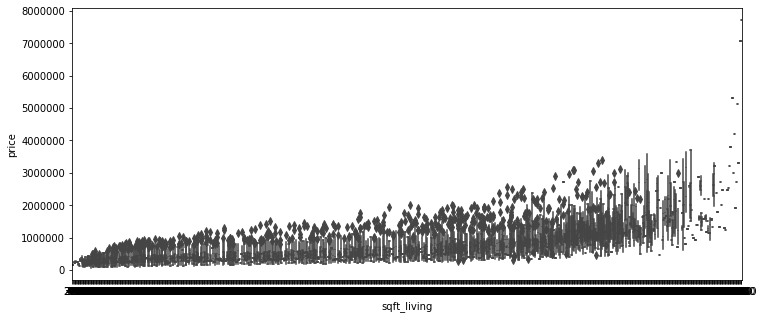

In [17]:
f, axe = plt.subplots(1, 1,figsize=(12,5))
sns.boxplot(x=house_df_train['sqft_living'],y=house_df_train['price'],ax=axe)

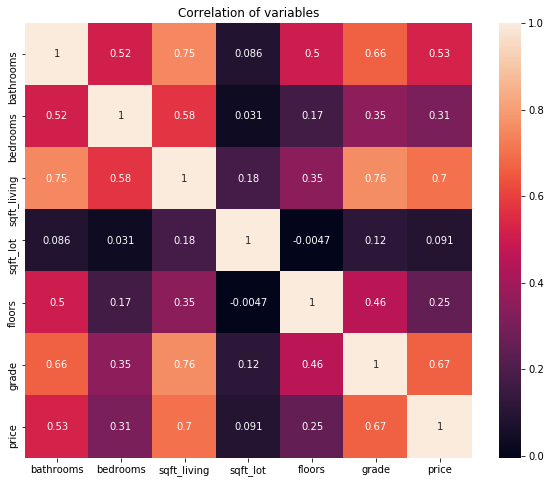

In [18]:
corr = house_df_train[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]
plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

# Data Preprocessing


In [19]:
# 1- Data Outliers Removal

In [20]:
house_df_processed_1=house_df_train.copy()

In [21]:
upper_bound=0.999

In [22]:
res= house_df_processed_1.price.quantile([upper_bound])
res

0.999    3331995.0
Name: price, dtype: float64

In [23]:
true_index=(house_df_processed_1.price.values< res.loc[upper_bound])

In [24]:
false_index= ~true_index

In [25]:
max=np.max(house_df_processed_1.price[true_index])
max

3300000.0

In [26]:
house_df_processed_1.loc[false_index,'price']=max

In [27]:
house_df_processed_1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.580764e+09,5.365249e+05,3.368132,2.113794,2073.894910,1.479895e+04,1.499161,0.007172,0.233025,3.407577,7.653846,1785.962175,287.932736,1971.108329,83.003412,98077.974378,47.560330,-122.214139,1982.904569,12725.059341
std,2.876743e+09,3.469783e+05,0.931385,0.766790,907.297963,3.883925e+04,0.542819,0.084385,0.761749,0.651698,1.170355,821.626290,438.727110,29.435603,398.503250,53.326084,0.138432,0.140498,681.232425,27525.258285
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123042e+09,3.201500e+05,3.000000,1.500000,1430.000000,5.001250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.472000,-122.329000,1480.000000,5083.000000
50%,3.905000e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7615.000000
75%,7.305301e+09,6.400000e+05,4.000000,2.500000,2540.000000,1.060675e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,550.000000,1997.000000,0.000000,98117.000000,47.678000,-122.125000,2360.000000,10046.000000
max,9.900000e+09,3.300000e+06,33.000000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

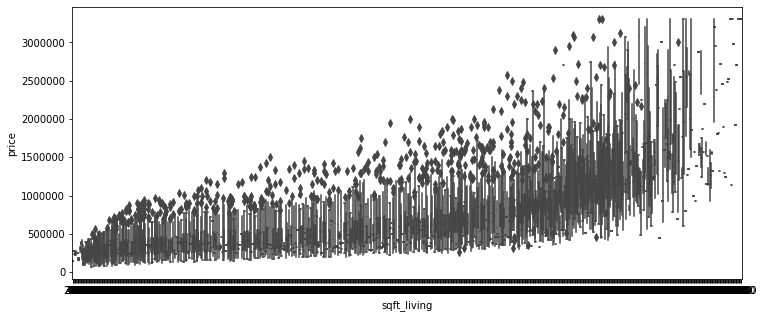

In [28]:
f, axe = plt.subplots(1, 1,figsize=(12,5))
sns.boxplot(x=house_df_processed_1['sqft_living'],y=house_df_processed_1['price'],ax=axe)

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/home/abdulmonem/ana

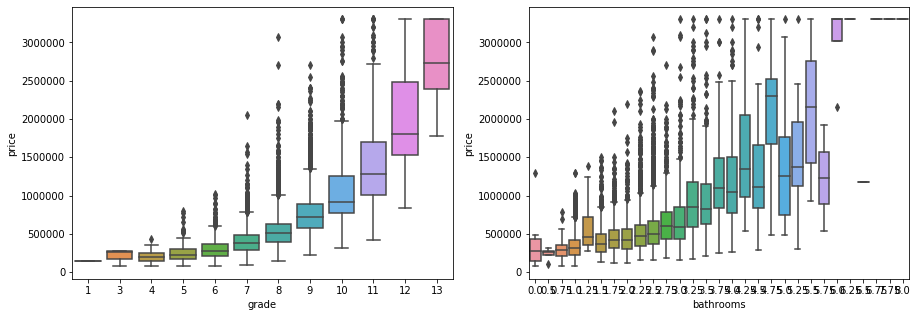

In [29]:
f, axes= plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=house_df_processed_1['grade'],y=house_df_processed_1['price'],ax=axes[0])
sns.boxplot(x=house_df_processed_1['bathrooms'],y=house_df_processed_1['price'],ax=axes[1])

In [30]:
corr=house_df_processed_1.corr()
corr['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702972
grade            0.678979
sqft_above       0.605992
sqft_living15    0.596507
bathrooms        0.529971
view             0.396117
lat              0.322068
sqft_basement    0.318892
bedrooms         0.313603
floors           0.260640
waterfront       0.245235
yr_renovated     0.125776
sqft_lot         0.093427
sqft_lot15       0.081105
yr_built         0.051451
condition        0.038232
long             0.025198
id              -0.023899
zipcode         -0.053790
Name: price, dtype: float64

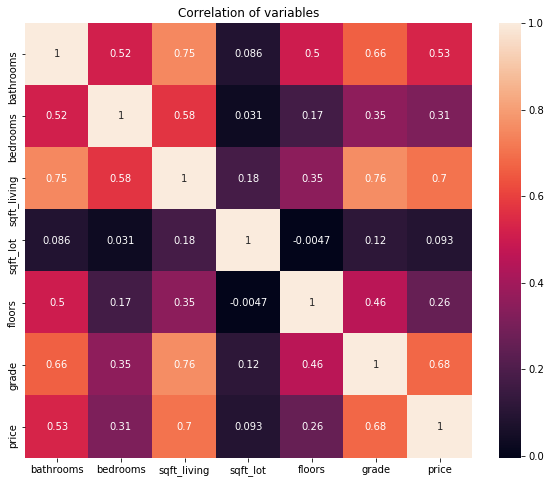

In [31]:
corr = house_df_processed_1[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]
plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [32]:
# removing ID and date feature
house_df_processed_1=house_df_processed_1.drop('id',axis=1)
house_df_processed_1=house_df_processed_1.drop('date',axis=1)

In [33]:
house_df_processed_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,325000.0,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,98042,47.3670,-122.152,2750,13095
13473,257000.0,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
17614,228500.0,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,98146,47.4838,-122.335,1170,7800
16970,288000.0,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,98031,47.3951,-122.172,1800,7350
20868,479000.0,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,98034,47.7043,-122.209,2090,10454


In [34]:
# 2- Adding a new compined attribute price per sqft
house_df_processed_2=house_df_processed_1.copy()
house_df_processed_2['price_per_sqft_living']=house_df_processed_2['price']/house_df_processed_2['sqft_living']

In [35]:
corr=house_df_processed_2.corr()
corr['price_per_sqft_living'].sort_values(ascending=False)

price_per_sqft_living    1.000000
price                    0.553798
lat                      0.474615
view                     0.216931
waterfront               0.181522
zipcode                  0.176870
grade                    0.114035
yr_renovated             0.103214
condition                0.101157
sqft_living15            0.031134
floors                   0.002182
sqft_basement           -0.030625
sqft_lot                -0.040690
sqft_lot15              -0.059315
bathrooms               -0.099561
sqft_above              -0.102589
sqft_living             -0.107711
bedrooms                -0.209588
long                    -0.236212
yr_built                -0.293481
Name: price_per_sqft_living, dtype: float64

In [36]:
house_df_processed_2=house_df_processed_2.drop('price_per_sqft_living',axis=1)

In [37]:
#adding a new combined feature bathrooms+bedrooms
house_df_processed_2['bath_bed']=house_df_processed_2['bathrooms']+house_df_processed_2['bedrooms']
corr=house_df_processed_2.corr()
corr['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702972
grade            0.678979
sqft_above       0.605992
sqft_living15    0.596507
bathrooms        0.529971
bath_bed         0.471823
view             0.396117
lat              0.322068
sqft_basement    0.318892
bedrooms         0.313603
floors           0.260640
waterfront       0.245235
yr_renovated     0.125776
sqft_lot         0.093427
sqft_lot15       0.081105
yr_built         0.051451
condition        0.038232
long             0.025198
zipcode         -0.053790
Name: price, dtype: float64

In [38]:
#3- reducing features dimensionality using PCA

In [39]:
house_df_processed_3=house_df_processed_2.copy()

In [40]:
X1=house_df_processed_3['sqft_living']
X2=house_df_processed_3['sqft_above']
sqft=np.matrix([X1,X2]).transpose()

In [41]:
pca=PCA(n_components=2)
pca_proj=pca.fit_transform(sqft)
pca.explained_variance_ratio_

array([0.93855957, 0.06144043])

In [42]:
PC1_sqft=pca_proj[:,0]
PC2_sqft=pca_proj[:,1]

In [43]:
house_df_processed_3['PC1']=PC1_sqft
house_df_processed_3['PC2']=PC2_sqft
corr=house_df_processed_3.corr()
corr['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702972
PC1              0.680843
grade            0.678979
sqft_above       0.605992
sqft_living15    0.596507
bathrooms        0.529971
bath_bed         0.471823
view             0.396117
lat              0.322068
sqft_basement    0.318892
bedrooms         0.313603
floors           0.260640
waterfront       0.245235
PC2              0.176140
yr_renovated     0.125776
sqft_lot         0.093427
sqft_lot15       0.081105
yr_built         0.051451
condition        0.038232
long             0.025198
zipcode         -0.053790
Name: price, dtype: float64

In [44]:
feat=['price','PC1','grade','bath_bed','view','lat','sqft_basement']
house_df_processed_3=house_df_processed_3[feat]

In [45]:
corr=house_df_processed_3.corr()
corr['price'].sort_values(ascending=False)

price            1.000000
PC1              0.680843
grade            0.678979
bath_bed         0.471823
view             0.396117
lat              0.322068
sqft_basement    0.318892
Name: price, dtype: float64

In [46]:
#seperate labels
house_labels= house_df_train['price'].copy()

In [47]:
house_df_processed_1= house_df_processed_1.drop('price',axis=1)
house_df_processed_3= house_df_processed_3.drop('price',axis=1)

In [48]:
# 4- appliying Standarization 
process_pipline= Pipeline([('std_scalar',StandardScaler())])

In [49]:
scaled_house_df= process_pipline.fit_transform(house_df_processed_1)
scaled_house_df_reduced= process_pipline.fit_transform(house_df_processed_3)

# Model Training

In [50]:
#applieng linear regression 

lin_reg= LinearRegression()
lin_reg.fit(scaled_house_df, house_labels)
score_lin_reg=lin_reg.score(scaled_house_df, house_labels)
price_predection= lin_reg.predict(scaled_house_df)
msqe=mean_squared_error(price_predection,house_labels)
rmse_lin_reg=np.sqrt(msqe)
print('Score=',score_lin_reg,'\n','RMSE=',rmse_lin_reg)

Score= 0.6991021854487474 
 RMSE= 198272.2430201281


In [51]:
#applieng Linear Regression on the reduced dataset

lin_reg.fit(scaled_house_df_reduced, house_labels)
score_lin_reg_reduced=lin_reg.score(scaled_house_df_reduced, house_labels)
price_predection= lin_reg.predict(scaled_house_df_reduced)
msqe=mean_squared_error(price_predection,house_labels)
rmse_lin_reg_reduced=np.sqrt(msqe)
print('Score=',score_lin_reg_reduced,'\n','RMSE=',rmse_lin_reg_reduced)

Score= 0.6393216467952133 
 RMSE= 217076.3157433019


In [52]:
# applieng Polynomial Regression

poly= PolynomialFeatures(degree=2)
house_df_poly=poly.fit_transform(scaled_house_df)
lin_reg.fit(house_df_poly, house_labels)
score_poly=lin_reg.score(house_df_poly, house_labels)
price_predection= lin_reg.predict(house_df_poly)
msqe_poly=mean_squared_error(price_predection,house_labels)
rmse_poly=np.sqrt(msqe_poly)
print('Score=',score_poly,'\n','RMSE=',rmse_poly)

Score= 0.8340249573449875 
 RMSE= 147256.2706317272


In [53]:
#applieng polynomial regression on reduced dataset

poly= PolynomialFeatures(degree=2)
house_df_poly=poly.fit_transform(scaled_house_df_reduced)
lin_reg.fit(house_df_poly, house_labels)
score_poly_reduced=lin_reg.score(house_df_poly, house_labels)
price_predection= lin_reg.predict(house_df_poly)
msqe_poly=mean_squared_error(price_predection,house_labels)
rmse_poly_reduced=np.sqrt(msqe_poly)
print('Score=',score_poly_reduced,'\n','RMSE=',rmse_poly_reduced)

Score= 0.727296232699692 
 RMSE= 188754.785801125


In [54]:
#applieng SGD regression

sgd= SGDRegressor(tol=0.0001, alpha=0.1)
sgd.fit(scaled_house_df,house_labels)
score_sgd=sgd.score(scaled_house_df,house_labels)
price_predection_SGD= sgd.predict(scaled_house_df)
msqe_sgd=mean_squared_error(price_predection_SGD,house_labels)
rmse_sgd=np.sqrt(msqe_sgd)
print('Score=',score_sgd,'\n','RMSE=',rmse_sgd)

Score= 0.6952417305383674 
 RMSE= 199540.08478179848


In [55]:
#applieng Kn regression

kn= KNeighborsRegressor()
kn.fit(scaled_house_df,house_labels)
score_kn=kn.score(scaled_house_df,house_labels)
price_predection_kn= kn.predict(scaled_house_df)
msqe_kn=mean_squared_error(price_predection_kn,house_labels)
rmse_kn=np.sqrt(msqe_kn)
print('Score=',score_kn,'\n','RMSE=',rmse_kn)

Score= 0.869332972723287 
 RMSE= 130657.8201901555


In [56]:
# applieng Decesion Trees

d_tree= DecisionTreeRegressor()
d_tree.fit(scaled_house_df,house_labels)
score_dtree=d_tree.score(scaled_house_df,house_labels)
price_predection= d_tree.predict(scaled_house_df)
t_msqe=mean_squared_error(price_predection,house_labels)
t_rmse=np.sqrt(t_msqe)
print('Score=',score_dtree,'\n','RMSE=',t_rmse)

Score= 0.9992357508194403 
 RMSE= 9992.401913529287


In [57]:
#applieng Random Forest

forest= RandomForestRegressor()
forest.fit(scaled_house_df,house_labels)
score_forest=forest.score(scaled_house_df,house_labels)
price_predection= forest.predict(scaled_house_df)
msqe=mean_squared_error(price_predection,house_labels)
rmse_forest=np.sqrt(msqe)
print('Score=',score_forest,'\n','RMSE=',rmse_forest)

/home/abdulmonem/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score= 0.9759225597441641 
 RMSE= 56086.39935073373


In [58]:
# applieng GBoost Regressior

gpr= GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1)
gpr.fit(scaled_house_df,house_labels)
score_gpr=gpr.score(scaled_house_df,house_labels)
price_predection= gpr.predict(scaled_house_df)
msqe=mean_squared_error(price_predection,house_labels)
rmse_gpr=np.sqrt(msqe)
print('Score=',score_gpr,'\n','RMSE=',rmse_gpr)

Score= 0.9722391561502768 
 RMSE= 60223.880359553266


In [59]:
# applieng cross validation
#decicion tree
scores= cross_val_score(d_tree,scaled_house_df,house_labels,scoring='neg_mean_squared_error',cv=10)
t_rmse=np.sqrt(-scores)
t_rmse.mean()

179844.94958050828

In [60]:
#random forest
forest_scores= cross_val_score(forest,scaled_house_df,house_labels,scoring='neg_mean_squared_error',cv=10)
forest_rmse=np.sqrt(-forest_scores)
forest_rmse.mean()

134472.38316876517

In [61]:
#gradiant boost
gpr_scores= cross_val_score(gpr,scaled_house_df,house_labels,scoring='neg_mean_squared_error',cv=10)
gpr_rmse=np.sqrt(-gpr_scores)
gpr_rmse.mean()

114734.92583375587

In [62]:
# applieng Parameter Grid Search
# random forest
param_grid=[{'n_estimators':[3,10,30],'max_features':[6,8,10]},
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
           ]
grid_search= GridSearchCV(forest,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(scaled_house_df,house_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [6, 8, 10],
      

In [63]:
cvres= grid_search.cv_results_

In [64]:
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

162139.67255953702 {'max_features': 6, 'n_estimators': 3}
136442.8785241117 {'max_features': 6, 'n_estimators': 10}
127749.77025180972 {'max_features': 6, 'n_estimators': 30}
153763.59007439358 {'max_features': 8, 'n_estimators': 3}
135176.38124224538 {'max_features': 8, 'n_estimators': 10}
127235.88478346122 {'max_features': 8, 'n_estimators': 30}
155511.76012121767 {'max_features': 10, 'n_estimators': 3}
134662.4315920365 {'max_features': 10, 'n_estimators': 10}
129054.58328317486 {'max_features': 10, 'n_estimators': 30}
168239.0612664753 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
146350.66421813122 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
163559.8479857374 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
137516.41152778987 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
159224.1232815387 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
132892.76417008232 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [65]:
#Gboost

gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02],
              'max_depth': [4, 5, 6],
              'min_samples_leaf': [20, 50,100],
              
              }
grid_search= GridSearchCV(gpr,gb_grid_params,cv=2,
                          scoring='neg_mean_squared_error',return_train_score=True,verbose=3,n_jobs=10)
grid_search.fit(scaled_house_df,house_labels)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   41.7s
[Parallel(n_jobs=10)]: Done  54 out of  54 | elapsed:  2.1min remaining:    0.0s
[Parallel(n_jobs=10)]: Done  54 out of  54 | elapsed:  2.1min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=5,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=400,
                                                 n_iter_no_change=None,
                

In [66]:
cvres_gpr= grid_search.cv_results_
for mean_score, params in zip(cvres_gpr['mean_test_score'],cvres_gpr['params']):
    print(np.sqrt(-mean_score),params)

125737.12275778448 {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 20}
134086.57086996065 {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 50}
143224.05642563628 {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 100}
127764.19175938195 {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 20}
132988.6650060079 {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 50}
144082.6344533087 {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 100}
128706.45599922334 {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 20}
133178.96721346083 {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 50}
144148.75749319058 {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 100}
129477.40749453339 {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 20}
138067.17556813557 {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 50}
147372.93931231325 {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 100}
130393.9551

In [67]:
grid_search.best_estimator_


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=20, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
final_model= grid_search.best_estimator_
X_test=test_set.drop('price',axis=1)
y_test=test_set['price'].copy()
X_test=X_test.drop('id',axis=1)
X_test=X_test.drop('date',axis=1)
X_test_final=process_pipline.fit_transform(X_test)

In [69]:
final_prediction=final_model.predict(X_test_final)

In [70]:
final_mse= mean_squared_error(y_test,final_prediction)
final_rmse=np.sqrt(final_mse)
final_rmse

139121.96640736013

In [71]:
final_model.score(X_test_final,y_test)

0.8719715408007702